# CSC 603 - Homework 2

### Name: Maryam sulaiman alhawity
### Id: 431000372

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import pandas as pd

# Part 1: Logestic regression

#### <font color='purple'> 1)  Write a function to compute sigmoid using the following equation: </font>

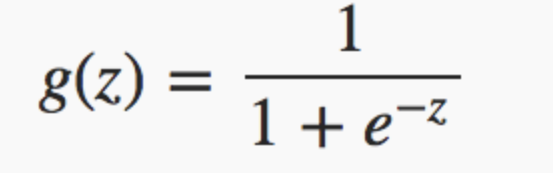

In [27]:
def sigmoid(z):
    
    ## write your code here
    return 1 / (1 + np.exp(-z))

In [28]:
z=np.array([0,2., -1, 22, 100])
print(sigmoid(z))

[0.5        0.88079708 0.26894142 1.         1.        ]


#### <font color='purple'> 2)  Write a function to compute the loss using the following formula </font>

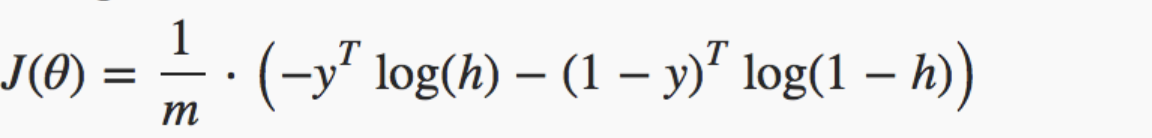

In [29]:

## y correct outputs
## y_bar: predicted outputs

def loss_fun(y, y_bar):
  # write your code here
    return (1/y.shape[0]) * np.sum((-y.T * np.log(y_bar) - (1-y).T * np.log(1-y_bar)))
    


In [30]:
y_bar=np.array([0.5, 0.88079708 ,0.26894142, .1, .3])
y=np.array([1,1,0,1,0])
print(loss_fun(y, y_bar))

0.7585193823768299


#### <font color='purple'> 3)  Write a function to compute the gradient using the following equation: </font>

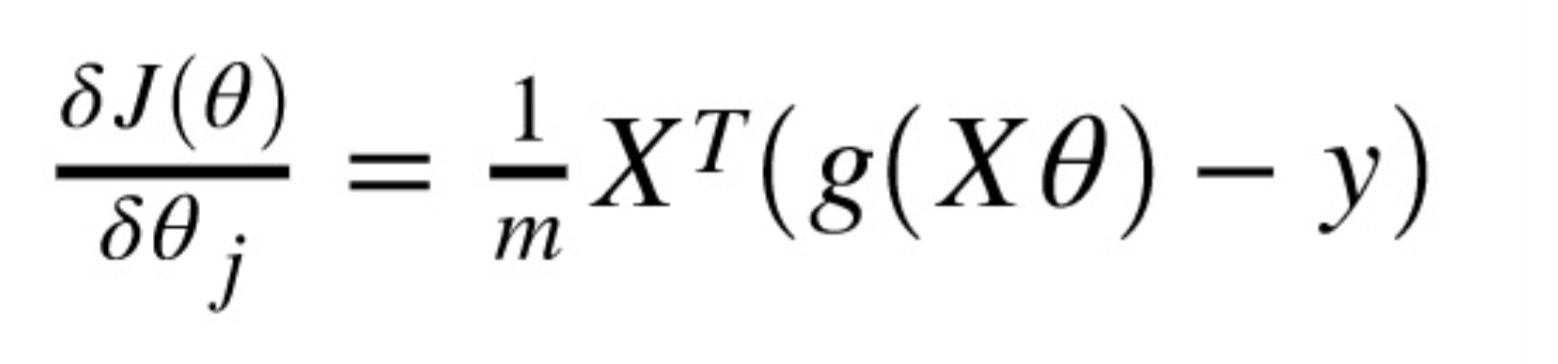

In [31]:
def compute_grad(X, y, y_bar):
    
    
    # write your code here
    return (1 / X.shape[0]) * np.dot((X.T), ((y_bar) -  y))
    
  
            

In [32]:
X=np.array([[1,0.77132064, 0.02075195, 0.63364823],
 [1, 1.74880388 ,0.49850701 ,0.22479665],
 [1, 0.19806286, 0.76053071 ,0.16911084],
 [1, 0.08833981 , 3.68535982 , -0.95339335],
 [1, -0.00394827 ,0.51219226 ,0.81262096]])


In [33]:
print(X.shape)

(5, 4)


In [34]:
y_bar=np.array([0.5, 0.88079708 ,0.26894142, .1, .3])
y=np.array([1,1,0,1,0])
g=compute_grad(X, y, y_bar)

print(g)

[-0.1900523  -0.12430917 -0.60568548  0.16074014]


#### <font color='purple'> 4)  Write a function to compute $z$ using the following equation: </font>

$ z=X *\theta $

In [35]:
def f(X, theta):
  
      ## write your code here
     return np.dot(X,theta)

In [36]:
theta=np.array([-1, .0, -2., .022])
z=f(X, theta)
print(z)

[-1.02756364 -1.99206849 -2.51734098 -8.39169429 -2.00650686]


#### <font color='purple'> 5)  Write a function to predict class labels for samples in X. </font>

In [37]:

def predict(X, theta):
    ### write your code here
            ## note if output>=0.5 then output 1 else: 0
    z = f(X,theta)
    z = sigmoid(z)
    print(z)
    z = np.where(z >= 0.5, 1, 0)
    return z

In [38]:
print(predict(X,theta))



[2.63556716e-01 1.20038198e-01 7.46514188e-02 2.26691383e-04
 1.18521435e-01]
[0 0 0 0 0]


#### <font color='purple'> 5)  Write a function to compute the accuracy </font>

In [39]:
def score(y, y_bar):
      ## write your code there
    correct = 0
    for i in range(len(y)):
        if y[i] == y_bar[i]:
            correct += 1
    return correct / float(len(y)) * 100.0
  

In [40]:
y_true=[1,1,1,0]
y_bar=[1,1,1,1]
print(score(y_true,y_bar))


75.0


## Let’s also define the train function which will be used to find the model parameters that minimizes the cost function using functions above.

In [41]:
def train(X,y, lr =0.02, iter =100):
    loss =[]
    theta = np.zeros(X.shape[1])
    for i in range(iter):
        z = f(X,theta)
        
        a = sigmoid(z)
        loss_= loss_fun(y,a)
        g = compute_grad(X,y, a)
        theta = theta-lr *g
        loss.append(loss_)
    print(theta)
    ##print(loss)
    
    rr = list(range(iter))
    plt.plot(rr, loss)
    plt.show()
    return theta
        
    

[-0.18732413 -0.16456771  0.22747216 -0.22780898]


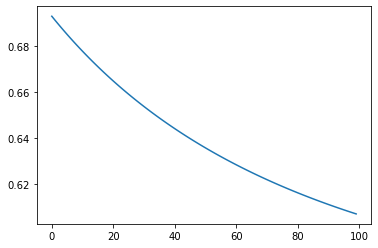

array([-0.18732413, -0.16456771,  0.22747216, -0.22780898])

In [42]:
X=np.array([[1,0.77132064, 0.02075195, 0.63364823],
 [1, 1.74880388 ,0.49850701 ,0.22479665],
 [1, 0.19806286, 0.76053071 ,0.16911084],
 [1, 0.08833981 , 3.68535982 , -0.95339335],
 [1, -0.00394827 ,0.51219226 ,0.81262096]])


y=np.array([1,0,0,1,0])
train(X,y)

#### <font color='purple'> 6)  - Load cancer dataset from sklearn. Split the data into 70% for traing and 30% for testing. Train the training set using train function. Then, cacluate the accuracy on testing set</font>

In [43]:
from sklearn.datasets import load_breast_cancer
data_C = load_breast_cancer()

In [44]:
X_C = data_C.data
Y_C = data_C.target


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_C, Y_C, test_size=0.30)

[ 2.95713715e+00  5.42378656e+00  1.81333154e+01  2.65522636e+01
  3.13376693e-02  1.16730558e-02 -1.47141236e-02 -7.32919055e-03
  5.80508853e-02  2.32297222e-02  2.03601562e-02  4.52877896e-01
  1.21497734e-01 -5.59962327e+00  2.71598872e-03  5.03723981e-03
  5.38849063e-03  2.37114887e-03  7.35617107e-03  1.27903074e-03
  2.82509812e+00  6.89236675e+00  1.72190501e+01 -1.94380844e+01
  4.03637052e-02  1.39196615e-02 -1.87185927e-02 -1.98591812e-03
  8.19847104e-02  2.58636455e-02]


C:\Users\maryam\AppData\Local\Temp/ipykernel_52428/1979952296.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\maryam\AppData\Local\Temp/ipykernel_52428/1050559362.py:6: RuntimeWarning: divide by zero encountered in log
  return (1/y.shape[0]) * np.sum((-y.T * np.log(y_bar) - (1-y).T * np.log(1-y_bar)))
C:\Users\maryam\AppData\Local\Temp/ipykernel_52428/1050559362.py:6: RuntimeWarning: invalid value encountered in multiply
  return (1/y.shape[0]) * np.sum((-y.T * np.log(y_bar) - (1-y).T * np.log(1-y_bar)))


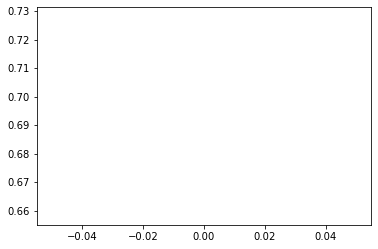

In [46]:
thetaa = train(X_train,y_train)

In [47]:
Y_bar = predict(X_test,thetaa)

[1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 7.38086933e-018
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 0.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 0.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 2.42625537e-049 1.00000000e+000
 1.00000000e+000 1.00000000e+000 2.62176173e-236 1.00000000e+000
 1.00000000e+000 0.00000000e+000 1.00000000e+000 0.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 0.00000000e+000 1.000000

C:\Users\maryam\AppData\Local\Temp/ipykernel_52428/1979952296.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [48]:
score(y_test,Y_bar)

66.08187134502924

# Part 2: Naive Bayes classifier

### You have a set of customers reviews (training set) and a classification as shown in the table below. 

In [51]:
reviews=[['he likes the restaurant'],['he dislikes the restaurant'],['wonderful restaurant'],
         ['great service and fantastic food']]
labels=['positive','negitive','positive','positive']

#### <font color='purple'> 1)  Write a function to return the number of all unique words in the training set</font>

In [52]:
def get_length_of_unique_words(corpus):
    ## write your code here
    flatten_List = [word for elem in corpus for word in elem]
    word_list = ' '.join(flatten_List).split(' ')
    corpus_set = set(word_list)
    return len(corpus_set)
    

In [53]:
V=get_length_of_unique_words(reviews)
print(V)

11


#### <font color='purple'> 2)  Write a function to return the number of all words in given class</font>

In [56]:
def get_length_of_all_words_for_given_class(corpus,All_labels, given_class):
    ### write your code here
    zipped_list = zip(corpus,All_labels)
    tuplee = tuple(zipped_list)
    
    list1 = []
        
    for i in range(len(tuplee)):
        if tuplee[i][1] == given_class:
            list1.append(tuplee[i][0])
    
    flatten_List = [word for elem in list1 for word in elem]
    word_list = ' '.join(flatten_List).split(' ')    
    return len(word_list)
    
    

In [57]:
## Test your code to validate the results
all_words_len_for_negitive_class=get_length_of_all_words_for_given_class(reviews,labels, 'negitive')
print(all_words_len_for_negitive_class)


all_words_len_for_positive_class=get_length_of_all_words_for_given_class(reviews,labels,'positive')
print(all_words_len_for_positive_class)


4
11


#### <font color='purple'> 3)  Write a function to return the occurance of given word in spcific class</font>

In [60]:
def get_of_occurance_of_word_in_given_class(word,corpus,labels, given_class):
    ## write your code here
    zipped_list = zip(corpus,labels)
    tuplee = tuple(zipped_list)
    
    list1 = []
        
    for i in range(len(tuplee)):
        if tuplee[i][1] == given_class:
            list1.append(tuplee[i][0])
    
    flatten_List = [word for elem in list1 for word in elem]
    word_list = ' '.join(flatten_List).split(' ')
    count_word = word_list.count(word)
    
    return count_word
    

In [61]:
occurance=get_of_occurance_of_word_in_given_class('restaurant', reviews, labels, 'negitive')
occurance

1

#### <font color='purple'> 4)  Write a function to calculate the  prior probablity for given class</font>

In [34]:
def get_prior_prob(c,labels):
    # write your code here
    count_word = labels.count(c)
    return count_word / float(len(labels)) * 100.0

In [35]:
print(get_prior_prob('negitive',labels))

25.0


#### <font color='purple'> 4)  Write a function to caclulate the likelihood for a word given a class p(word|class)</font>

In [36]:
## p(word|class)

def get_likelihood_for_given_word(corpus, all_labels, word, given_class):
    V=get_length_of_unique_words(corpus)
    Len_of_all_words_for_given_class=get_length_of_all_words_for_given_class(corpus,all_labels, given_class)
    occurance_ =get_of_occurance_of_word_in_given_class(word, corpus, labels, given_class)
    
    ## apply the formula
    likeihood=(occurance_+1)/(Len_of_all_words_for_given_class+V)
    return likeihood
  

In [37]:
likeihood=get_likelihood_for_given_word(reviews, labels, 'restaurant', 'negitive')
print(likeihood)


0.13333333333333333


# Part 3: Classification using PCA, KNN, and logesitic regression

### LFW dataset
###### The LFW dataset contains 13,233 images of faces collected from the web. This dataset consists of the 5749 identities with 1680 people with two or more images.

In [62]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [63]:
## load lfw dataset
lfw= fetch_lfw_people(min_faces_per_person=10)


In [64]:
print(lfw.DESCR[:500])

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two


In [65]:
X=lfw.data
X.shape
## image size = 62* 47=2914

(4324, 2914)

In [66]:
y = lfw.target

In [67]:
y

array([ 54,   0, 134, ...,  98, 136,  29], dtype=int64)

### 1- Normalize the input features with mean zero and variance one

In [68]:
### write your code here

from sklearn import preprocessing
X_normalized = preprocessing.normalize(X)

In [69]:
len(lfw.target_names)

158

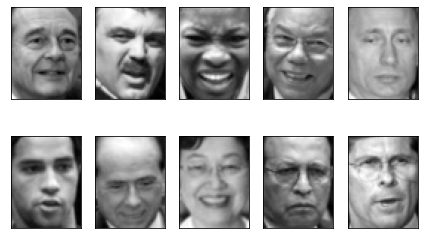

In [70]:
def plot_faces(images, n_row=2, n_col=5):
    w=47
    h=62
    """Helper function to plot a gallery of portraits"""
 
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()

#plot the average face and some samples from the dataset
plot_faces(X)


### 2- Split data to 70% for training and 30% for testing. Use train_test_split from sklearn with random_state=5

In [71]:
## write your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

### 3- Write Python code to implement a face recognition systems using scikit-learn on lfw dataset. These systems include:
1- Logestic regression model  (feed the images [raw features] into the logestic regression directly)<br> 
2- PCA + K_NN (number of principle components=100)<br>
3- PCA+ logestic regression( number of principle components=100)<br>
4- K-NN<br>
5- Create a table comparsions to compare the accuracy of the Face recogniton systems above (Note: use tabulate library to print tabular data. For more details: https://pypi.org/project/tabulate/


In [72]:
### write your code here
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='liblinear')
lg.fit(X_train,y_train)
lg_acc = lg.score(X_test,y_test)
print(lg_acc)

0.44684129429892144


In [73]:
#PCA (number of principle components=100)
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

x_train = pd.DataFrame(pca.fit_transform(X_train))
x_test  = pd.DataFrame(pca.fit_transform(X_test))

In [74]:
# KNN after PCA
from sklearn.neighbors import KNeighborsClassifier
neigh_pca = KNeighborsClassifier(n_neighbors=4)
neigh_pca.fit(x_train, y_train)
knn_score_pca = neigh_pca.score(x_test,y_test)
print(knn_score_pca)

0.03852080123266564


In [75]:
from sklearn.linear_model import LogisticRegression
lg_pca = LogisticRegression(solver='liblinear')
lg_pca.fit(x_train,y_train)
lg_acc_pca = lg_pca.score(x_test,y_test)
print(lg_acc_pca)

0.05624036979969183


In [76]:
# KNN without PCA
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
knn_score = neigh.score(X_test,y_test)
print(knn_score)

0.2103235747303544


In [77]:
from tabulate import tabulate
table = [['Logitsic regression',lg_acc],['PCA + K_NN',knn_score_pca],['PCA+ logistic regression',lg_acc_pca],['K-NN',knn_score]]
headers = ["Model", "Accuracy"]

In [78]:
print(tabulate(table, headers, tablefmt="grid"))

+--------------------------+------------+
| Model                    |   Accuracy |
+==========================+============+
| Logitsic regression      |  0.446841  |
+--------------------------+------------+
| PCA + K_NN               |  0.0385208 |
+--------------------------+------------+
| PCA+ logistic regression |  0.0562404 |
+--------------------------+------------+
| K-NN                     |  0.210324  |
+--------------------------+------------+


### 4- Plot the decision boundary of K_NN and Logestic regression  (Note: you need to used pca to reduce the dimensions to 2 then apply K_NN and Logestic

In [79]:
#PCA (number of principle components=2)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

x_train1 = pd.DataFrame(pca.fit_transform(X_train))
x_test1  = pd.DataFrame(pca.fit_transform(X_test))

In [24]:
# KNN after PCA
from sklearn.neighbors import KNeighborsClassifier
neigh_pca = KNeighborsClassifier(n_neighbors=4)
neigh_pca.fit(x_train1, y_train)
knn_score_pca = neigh_pca.score(x_test1,y_test)
print(knn_score_pca)

0.0362095531587057


In [25]:
type(y_test)

numpy.ndarray

In [26]:
x_train11 = x_train1.to_numpy()

In [27]:
type(x_train1)

pandas.core.frame.DataFrame

C:\Users\maryam\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


<AxesSubplot:>

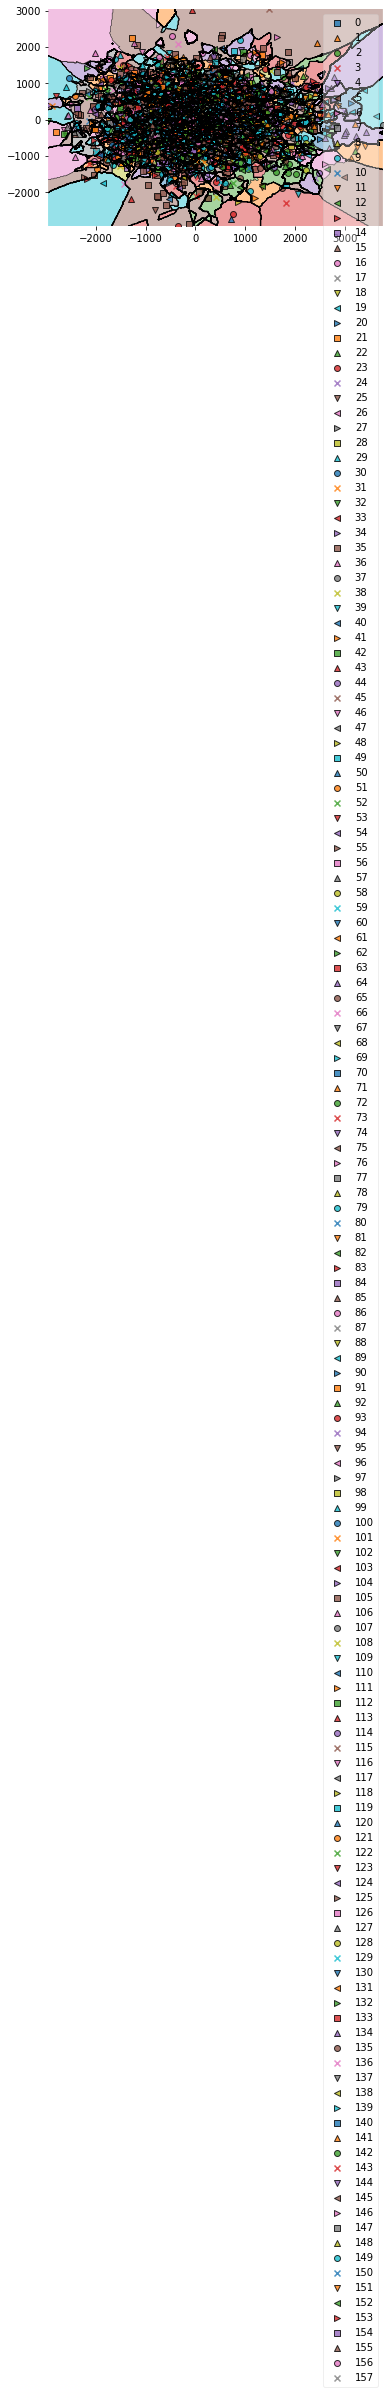

In [67]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train11, y_train, clf=neigh_pca)

In [43]:
from sklearn.linear_model import LogisticRegression
lg_pca_2d = LogisticRegression(solver='liblinear')
lg_pca_2d.fit(x_train1,y_train)

LogisticRegression(solver='liblinear')

C:\Users\maryam\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


<AxesSubplot:>

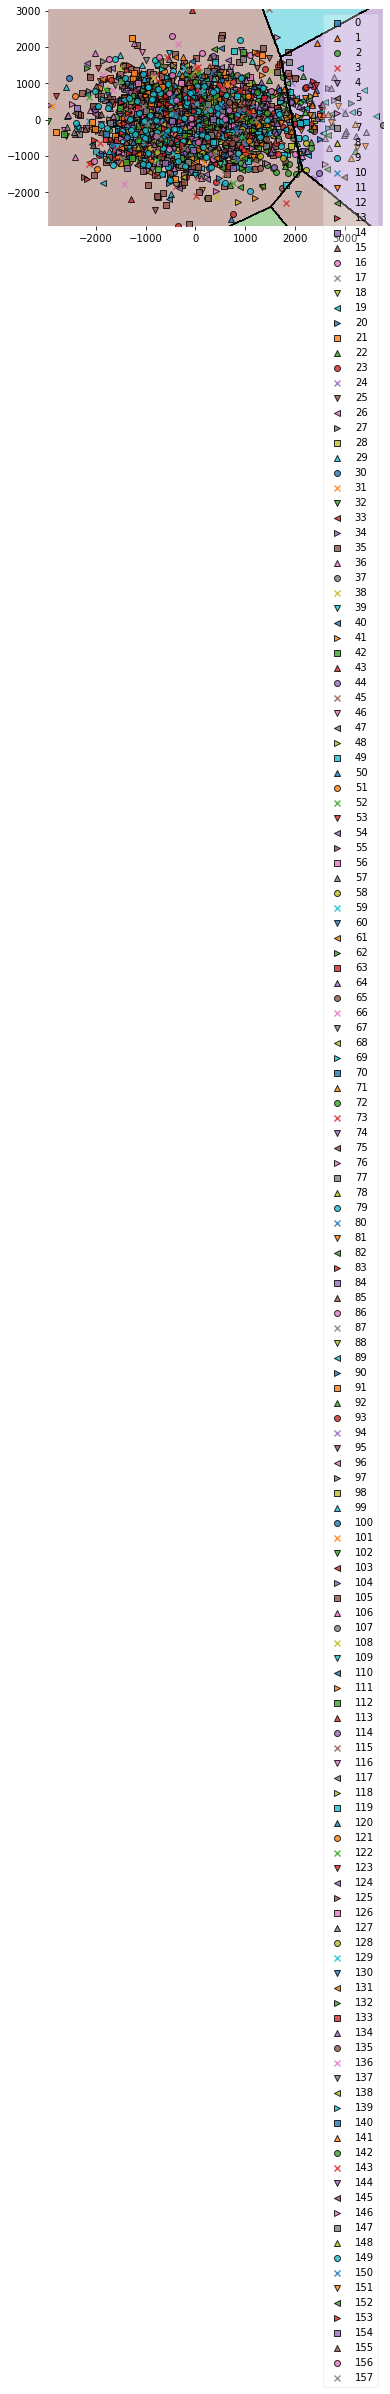

In [44]:
plot_decision_regions(x_train11, y_train, clf=lg_pca_2d)